# Trying Tensor Flow

This is based on Adrian Bevan's ML example named "FunctionApproimation" to try and see if I can adapt his code to work on different functions

In [24]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.compat.v1.disable_eager_execution()

print("Using the following TensorFlow version:")
print(tf.__version__)
# Network training parameters
learning_rate    = 0.01
training_epochs  = 4000
min_x = -10
max_x = 10
Ngen  = 10000

# Network architecture parameters
n_input    = 1   # 1D function, so there is one input feature per example
n_classes  = 1   # Regression output is single valued
n_nodes    = 50  # 1st layer num features
noise      = 0.5 # add a noise term to simulate fluctuations in the data

print("--------------------------------------------")
print("Number of input features       = ", n_input)
print("Number of output classes       = ", n_classes)
print("Number of examples to generate = ", Ngen)
print("Learning rate            alpha = ", learning_rate)
print("Number of training epochs      = ", training_epochs)
print("--------------------------------------------")

Using the following TensorFlow version:
2.0.0
--------------------------------------------
Number of input features       =  1
Number of output classes       =  1
Number of examples to generate =  10000
Learning rate            alpha =  0.01
Number of training epochs      =  4000
--------------------------------------------


In [25]:
def myFunctionTF(arg):
    return myFunctionTF_true(arg)+noise*tf.random.normal([Ngen, 1])

def myFunctionTF_true(arg):
    return tf.math.sin(arg)


x = tf.compat.v1.placeholder(tf.float32, [None, n_input], name="x")
y = tf.compat.v1.placeholder(tf.float32, [None, n_classes], name="y")


print("Creating a hidden layer with ", n_nodes, " nodes")
w_layer_1    = tf.Variable(tf.random.normal([n_input, n_nodes]), name="weights_layer_1")
bias_layer_1 = tf.Variable(tf.random.normal([n_nodes]), name="bias_layer_1")
layer_1      = tf.nn.relu(tf.add(tf.matmul(x,w_layer_1),bias_layer_1))


print("Creating the output layer ", n_classes, " output values")
output       = tf.Variable(tf.random.normal([n_nodes, n_classes]), name="weights_output")
bias_output  = tf.Variable(tf.random.normal([n_classes]), name="bias_output")
output_layer = tf.matmul(layer_1, output) + bias_output


print("Using the L2 loss function implemented in tf.nn")
loss = tf.nn.l2_loss(y - output_layer)


print("Using the Adam optimiser to train the network")
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


print("Generating the test and training sets.  There are ", Ngen, " examples in each")
tftraindata = tf.random.uniform([Ngen, 1], min_x, max_x)  # training set
tftestdata  = tf.random.uniform([Ngen, 1], min_x, max_x)  # test set

probabilities = output_layer

init  = tf.compat.v1.global_variables_initializer()

sess = tf.compat.v1.Session()
sess.run(init)

traindata    = sess.run(tftraindata) 
target_value = sess.run(myFunctionTF(traindata))

testdata   = sess.run(tftestdata) 
test_value = sess.run(myFunctionTF(testdata))
true_value = sess.run(myFunctionTF_true(testdata))

Creating a hidden layer with  50  nodes
Creating the output layer  1  output values
Using the L2 loss function implemented in tf.nn
Using the Adam optimiser to train the network
Generating the test and training sets.  There are  10000  examples in each


In [26]:
input_value      = []
epoch_set        = []
loss_test_value  = []
loss_set         = []
prediction_value = []

print("Will run through ", training_epochs, " training epochs")
for epoch in range(training_epochs):
    the_loss = 0.
    
    if not (epoch % 500):
        print("  Training epoch number ", epoch)
    sess.run(optimizer, feed_dict={x: traindata, y: target_value})
    the_loss = sess.run(loss, feed_dict={x: traindata, y: target_value})

    loss_set.append(the_loss)
    epoch_set.append(epoch+1)
    
    the_loss = sess.run(loss, feed_dict={x: testdata, y: test_value})
    loss_test_value.append(the_loss)

    if epoch == training_epochs-1:
        step = (max_x - min_x)/100
        for i in range(100):
            thisx = min_x + i*step
            pred = probabilities.eval(feed_dict={x: [[thisx]]}, session=sess)
            #print ("x = ", thisx, ", prediction =", pred)
            input_value.append(thisx)
            prediction_value.append(pred[0])

            pred = probabilities.eval(feed_dict={x: [[-thisx]]}, session=sess)
            #print ("x = ", -thisx, ", prediction =", pred)
            input_value.append(-thisx)
            prediction_value.append(pred[0])
            
print("Network training complete")

Will run through  4000  training epochs
  Training epoch number  0
  Training epoch number  500
  Training epoch number  1000
  Training epoch number  1500
  Training epoch number  2000
  Training epoch number  2500
  Training epoch number  3000
  Training epoch number  3500
Network training complete


Note
  The blue line is the true values of the funciton that the NN has learned to approximate.
  The red line is the function learned.
  Deviations between the blue and red line are errors in the modeling


<IPython.core.display.Javascript object>


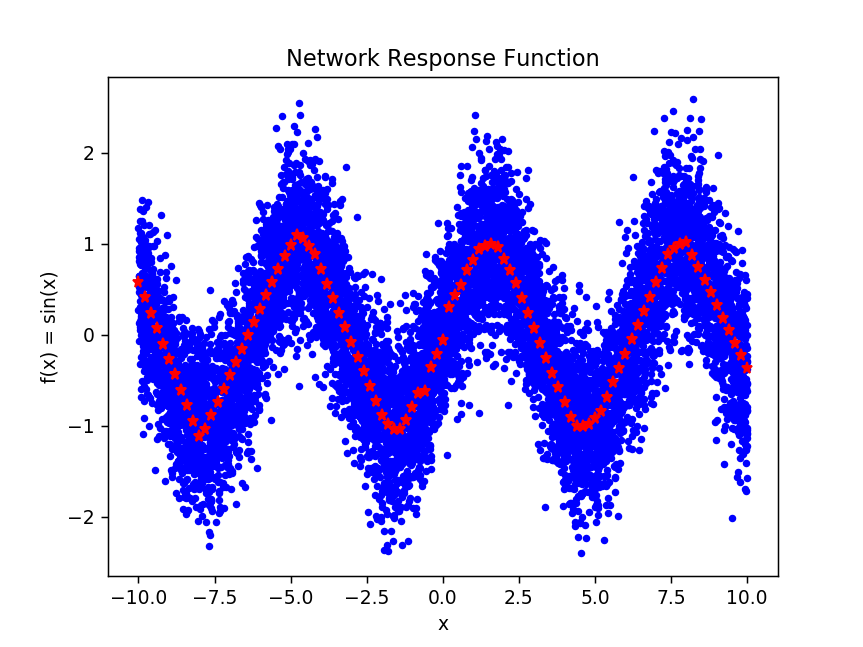

Text(0.5,1,'Network Response Function')

In [27]:
print("Note\n  The blue line is the true values of the funciton that the NN has learned to approximate.")
print("  The red line is the function learned.")
print("  Deviations between the blue and red line are errors in the modeling")
%matplotlib notebook
plt.plot(testdata, test_value, 'b.')
plt.ylabel('f(x) = sin(x)')
plt.xlabel('x')
plt.title('Test data')
plt.plot(input_value, prediction_value, 'r*')
plt.ylabel('f(x) = sin(x)')
plt.xlabel('x')
plt.title('Network Response Function')

The loss vs epoch is plotted below, where the blue is train data, and red test data


<IPython.core.display.Javascript object>


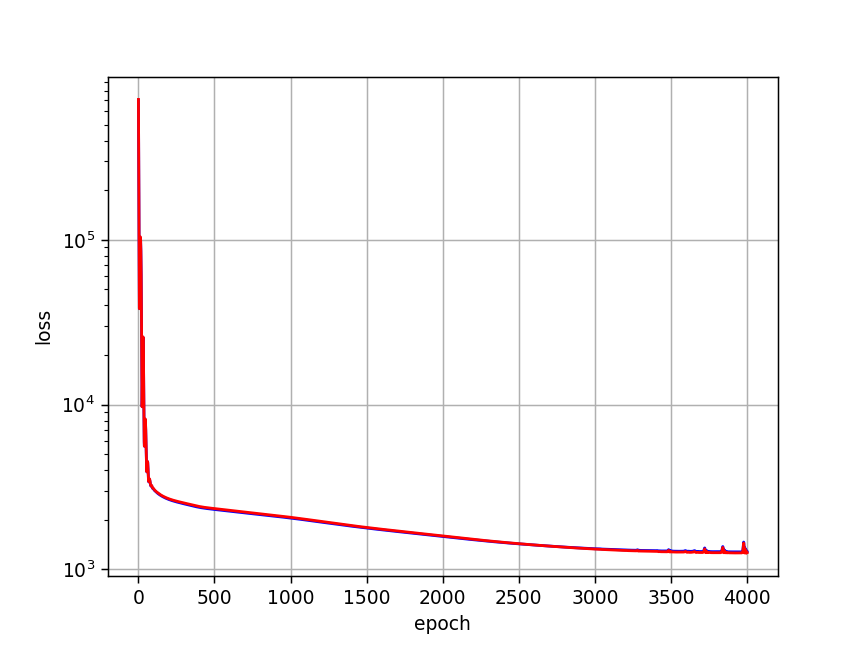

Text(0.5,0,'epoch')

In [28]:
print("The loss vs epoch is plotted below, where the blue is train data, and red test data")
# for log plots comment out the following
%matplotlib notebook
#plt.plot(epoch_set, loss_set, 'o', label='MLP Training phase')
#plt.plot(epoch_set, loss_test_value, 'rx', label='MLP Training phase')
# For log plots uncomment the following
plt.semilogy(epoch_set, loss_set, 'b-', label='MLP Training phase')
plt.semilogy(epoch_set, loss_test_value, 'r-', label='MLP Training phase')
plt.grid(True)
plt.ylabel('loss')
plt.xlabel('epoch')

The difference between the loss function value for the test and train data is used
as a measure of the training.  If the train data diverges signficiantly from the test
data loss function value then the network is overtrained


<IPython.core.display.Javascript object>


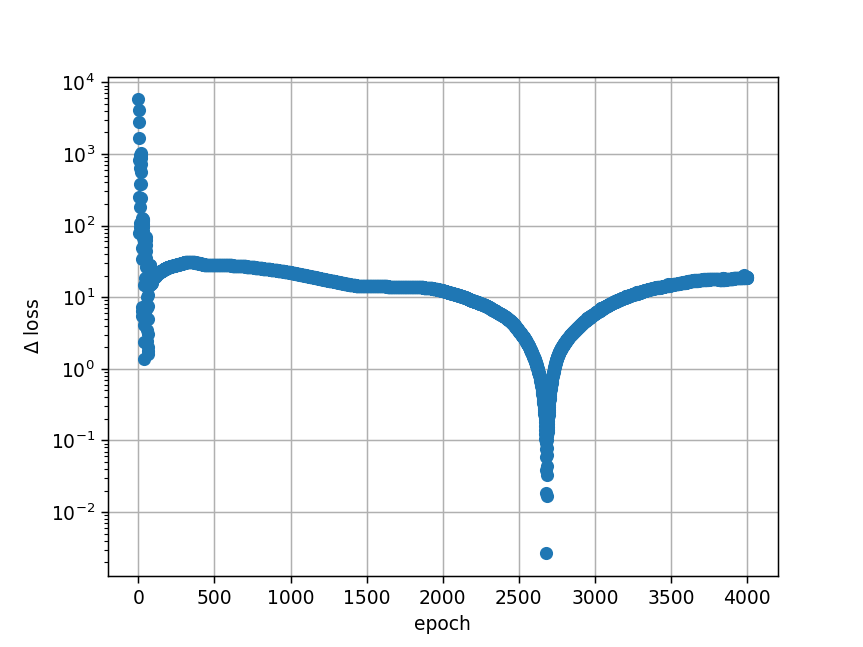

Text(0.5,0,'epoch')

In [29]:
print("The difference between the loss function value for the test and train data is used")
print("as a measure of the training.  If the train data diverges signficiantly from the test")
print("data loss function value then the network is overtrained")
%matplotlib notebook
delta = np.subtract(loss_test_value, loss_set)
plt.semilogy(epoch_set, np.absolute(delta), 'o', label='MLP Training phase')
plt.grid(True)
plt.ylabel('$\Delta$ loss')
plt.xlabel('epoch')